In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-sizeing all the images to dataset
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Rust disease/Train'
valid_path = '/content/drive/MyDrive/Rust disease/Test'

In [ ]:
# adding preprocessing layer to the front of Xception
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in mobilenet.layers:
  layer.trainable = False

In [ ]:
# for getting number of classes
folders = glob('/content/drive/MyDrive/Rust disease/Train*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)

In [ ]:
folders

['/content/drive/MyDrive/Rust disease/Train/Healthy',
 '/content/drive/MyDrive/Rust disease/Train/Rust']

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

Compilation

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  # optimizer='SGD',
  metrics=['accuracy']
)

Image Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Rust disease/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Rust disease/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 892 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Fit generator

In [ ]:
import tensorflow as tf

from keras.models import load_model

In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
28/28 [==============================] - 134s 5s/step - loss: 0.1348 - accuracy: 0.9933 - val_loss: 0.6893 - val_accuracy: 0.9700
Epoch 2/10
28/28 [==============================] - 127s 5s/step - loss: 0.1574 - accuracy: 0.9877 - val_loss: 0.0563 - val_accuracy: 0.9900
Epoch 3/10
28/28 [==============================] - 128s 5s/step - loss: 0.1019 - accuracy: 0.9910 - val_loss: 0.0408 - val_accuracy: 0.9800
Epoch 4/10
28/28 [==============================] - 120s 4s/step - loss: 0.0671 - accuracy: 0.9933 - val_loss: 0.1709 - val_accuracy: 0.9900
Epoch 5/10
28/28 [==============================] - 133s 5s/step - loss: 0.0335 - accuracy: 0.9966 - val_loss: 0.2968 - val_accuracy: 0.9900
Epoch 6/10
28/28 [==============================] - 122s 4s/step - loss: 0.0155 - accuracy: 0.9966 - val_loss: 0.0102 - val_accuracy: 0.9900
Epoch 7/10
28/28 [==============================] - 133s 5s/step - loss: 0.0201 - accuracy: 0.9966 - val_loss: 0.5186 - val_accuracy: 0.9900
Epoch 8/10
28

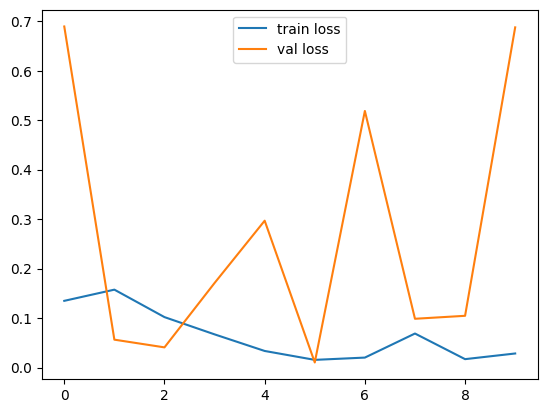

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')
plt.show()

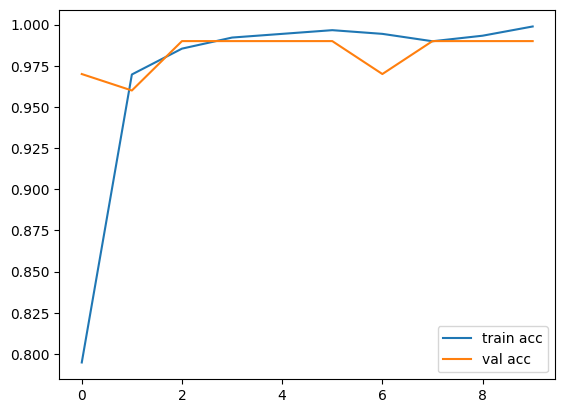

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Figure size 640x480 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

model.save('facefeatures_new_model.h5')